<a href="https://colab.research.google.com/github/siddhantjain07/Tensorflow-in-Practice/blob/master/3.TF-NLP/TF_NLP6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Single Layered LSTM

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow_datasets as tfds
import tensorflow as tf

In [2]:
#Working on IMDB 
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteDR898Z/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteDR898Z/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteDR898Z/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [3]:
tokenizer = info.features['text'].encoder

In [5]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_dataset))

In [6]:
model = tf.keras.Sequential([
   tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
   tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
   tf.keras.layers.Dense(64, activation=tf.nn.relu),
   tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)                          
])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048     
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 598,209
Trainable params: 598,209
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
num_epochs = 10
history = model.fit(train_dataset, epochs=num_epochs, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 60s 153ms/step - loss: 0.5607 - accuracy: 0.7074 - val_loss: 0.4663 - val_accuracy: 0.7872
Epoch 2/10
391/391 [==============================] - 59s 151ms/step - loss: 0.3642 - accuracy: 0.8500 - val_loss: 0.4157 - val_accuracy: 0.8223
Epoch 3/10
391/391 [==============================] - 60s 152ms/step - loss: 0.2699 - accuracy: 0.8959 - val_loss: 0.4280 - val_accuracy: 0.8299
Epoch 4/10
391/391 [==============================] - 60s 152ms/step - loss: 0.2503 - accuracy: 0.9030 - val_loss: 0.3822 - val_accuracy: 0.8463
Epoch 5/10
391/391 [==============================] - 59s 151ms/step - loss: 0.1845 - accuracy: 0.9327 - val_loss: 0.4407 - val_accuracy: 0.8468
Epoch 6/10
391/391 [==============================] - 59s 150ms/step - loss: 0.1535 - accuracy: 0.9445 - val_loss: 0.5336 - val_accuracy: 0.7881
Epoch 7/10
391/391 [==============================] - 58s 149ms/step - loss: 0.1311 - accuracy: 0.9546 - val_loss: 0.5213 - val_ac

In [11]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

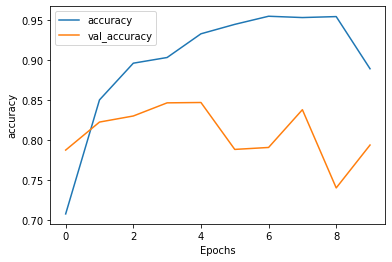

In [15]:
plot_graphs(history, 'accuracy')

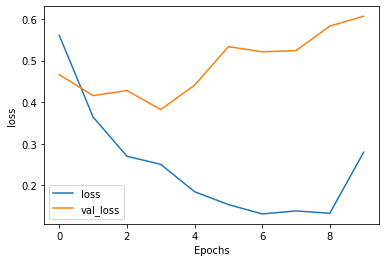

In [14]:
plot_graphs(history, 'loss')

##Multilayered LSTM

In [16]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation=tf.nn.relu),
    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)                         
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 64)          523840    
_________________________________________________________________
bidirectional_1 (Bidirection (None, None, 128)         66048     
_________________________________________________________________
bidirectional_2 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 635,329
Trainable params: 635,329
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [19]:
num_epochs = 5
history = model.fit(train_dataset, epochs=num_epochs, validation_data=test_dataset)

Epoch 1/5
391/391 [==============================] - 106s 271ms/step - loss: 0.4001 - accuracy: 0.8288 - val_loss: 0.5137 - val_accuracy: 0.7487
Epoch 2/5
391/391 [==============================] - 107s 274ms/step - loss: 0.3307 - accuracy: 0.8666 - val_loss: 0.4692 - val_accuracy: 0.7776
Epoch 3/5
391/391 [==============================] - 107s 273ms/step - loss: 0.2627 - accuracy: 0.8968 - val_loss: 0.6143 - val_accuracy: 0.6830
Epoch 4/5
391/391 [==============================] - 105s 270ms/step - loss: 0.4782 - accuracy: 0.7762 - val_loss: 0.5368 - val_accuracy: 0.7563
Epoch 5/5
391/391 [==============================] - 106s 271ms/step - loss: 0.3206 - accuracy: 0.8683 - val_loss: 0.4162 - val_accuracy: 0.8228
